# E-Commerce Shipping Data

#### Context

An international e-commerce company based wants to discover key insights from their customer database. They want to use some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

#### Content

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:

ID: ID Number of Customers.
Warehouse block : The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
Cost of the product: Cost of the Product in US Dollars.
Prior purchases: The Number of Prior Purchase.
Product importance: The company has categorized the product in the various parameter such as low, medium, high.
Gender: Male and Female.
Discount offered: Discount offered on that specific product.
Weight in gms: It is the weight in grams.
Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

### import dataset

In [1]:
import pandas as pd
ecommerce = pd.read_csv("/Users/pierrot/Downloads/Train_ecommerce.csv")

### Dataset info 

In [2]:
print(ecommerce.head())

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

In [3]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
ecommerce.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [10]:
ecommerce.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

#### Quanti

Describe() pour les variables quantitatives

In [6]:
ecommerce.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


#### Quali

value_counts() pour analyser la fréquence des variables qualitatives

In [12]:
ecommerce["Warehouse_block"].value_counts()

F    3666
D    1834
C    1833
A    1833
B    1833
Name: Warehouse_block, dtype: int64

In [13]:
ecommerce["Reached.on.Time_Y.N"].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [14]:
ecommerce["Mode_of_Shipment"].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [15]:
ecommerce["Product_importance"].value_counts()

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

In [16]:
ecommerce["Gender"].value_counts()

F    5545
M    5454
Name: Gender, dtype: int64

In [17]:
ecommerce["Customer_rating"].value_counts()

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

In [19]:
ecommerce["Prior_purchases"].value_counts()

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

### Target

In [49]:
X = "Product_importance"
Y = "Reached.on.Time_Y.N"


cont = ecommerce[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", dropna=False)
cont

Reached.on.Time_Y.N,0,1,Total
Product_importance,,,
high,332,616,948
low,2157,3140,5297
medium,1947,2807,4754
Total,4436,6563,10999


In [50]:
X = "Warehouse_block"
Y = "Reached.on.Time_Y.N"


cont = ecommerce[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", dropna=False)
cont

Reached.on.Time_Y.N,0,1,Total
Warehouse_block,,,
A,758,1075,1833
B,729,1104,1833
C,739,1094,1833
D,738,1096,1834
F,1472,2194,3666
Total,4436,6563,10999


In [51]:
X = "Customer_rating"
Y = "Reached.on.Time_Y.N"


cont = ecommerce[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", dropna=False)
cont

Reached.on.Time_Y.N,0,1,Total
Customer_rating,,,
1,922,1313,2235
2,892,1273,2165
3,882,1357,2239
4,886,1303,2189
5,854,1317,2171
Total,4436,6563,10999


In [52]:
X = "Gender"
Y = "Reached.on.Time_Y.N"


cont = ecommerce[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total", dropna=False)
cont

Reached.on.Time_Y.N,0,1,Total
Gender,,,
F,2249,3296,5545
M,2187,3267,5454
Total,4436,6563,10999


## Données Manquantes

In [21]:
ecommerce.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Data viz

In [24]:
import matplotlib.pyplot as plt

#### Quanti

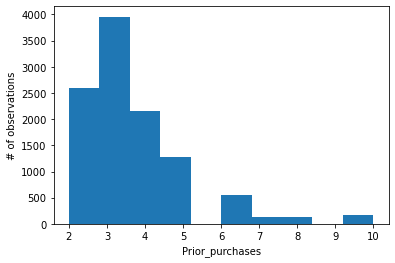

In [39]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(ecommerce.Prior_purchases)


# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Prior_purchases")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

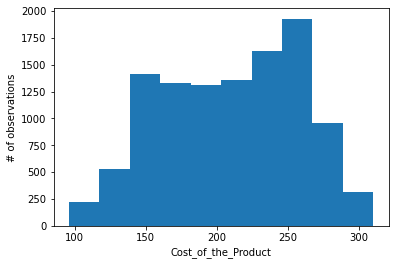

In [38]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(ecommerce.Cost_of_the_Product)


# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Cost_of_the_Product")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

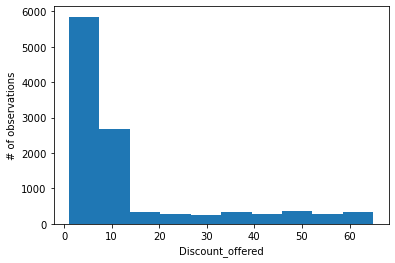

In [40]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(ecommerce.Discount_offered)


# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Discount_offered")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

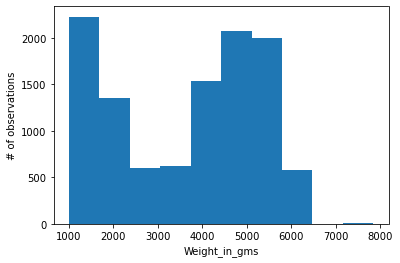

In [41]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(ecommerce.Weight_in_gms)


# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight_in_gms")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

#### Quali

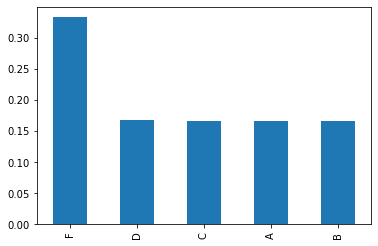

In [31]:
# Plot a bar-chart Warehouse_block
ecommerce["Warehouse_block"].value_counts(normalize=True, dropna=False).plot(kind='bar')

# Set the x-axis tick labels 
ax.set_xticklabels(ecommerce.Warehouse_block, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

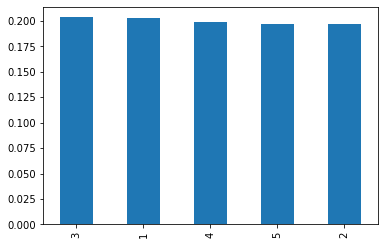

In [32]:
# Plot a bar-chart Customer_rating
ecommerce["Customer_rating"].value_counts(normalize=True, dropna=False).plot(kind='bar')

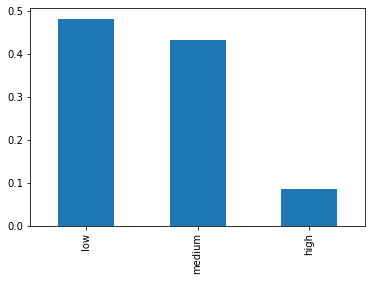

In [33]:
# Plot a bar-chart 
ecommerce["Product_importance"].value_counts(normalize=True, dropna=False).plot(kind='bar')

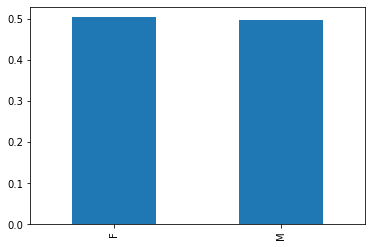

In [34]:
# Plot a bar-chart Gender
ecommerce["Gender"].value_counts(normalize=True, dropna=False).plot(kind='bar')

### Boxplot

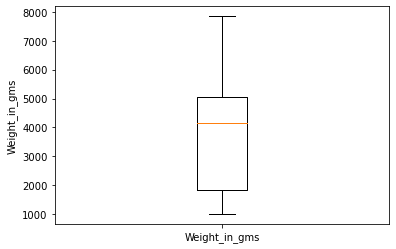

In [45]:
fig, ax = plt.subplots()

# Add a boxplot 
ax.boxplot([ecommerce["Weight_in_gms"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Weight_in_gms"])

# Add a y-axis label
ax.set_ylabel("Weight_in_gms")

plt.show()

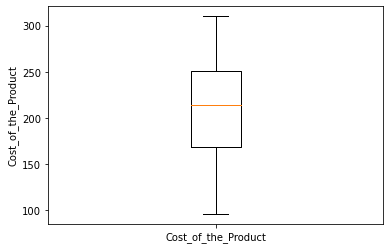

In [44]:
fig, ax = plt.subplots()

# Add a boxplot 
ax.boxplot([ecommerce["Cost_of_the_Product"]])

# Add x-axis tick labels:
ax.set_xticklabels(["Cost_of_the_Product"])

# Add a y-axis label
ax.set_ylabel("Cost_of_the_Product")

plt.show()

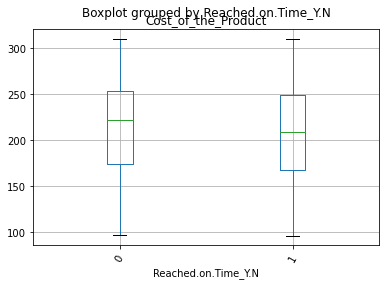

In [46]:
#boxplot
ecommerce.boxplot('Cost_of_the_Product', 'Reached.on.Time_Y.N', rot=60)

plt.show()

#### Corrélation

correlation entre les variables quantitatives

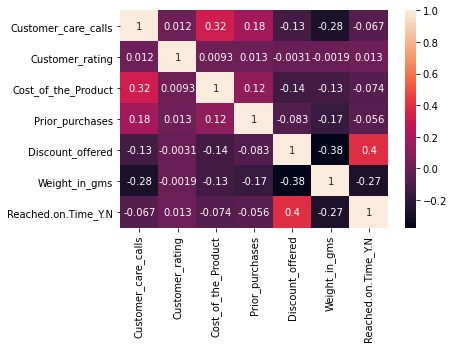

In [47]:
import seaborn as sns

import matplotlib.pyplot as plt

df_corr = ecommerce.loc[:,['Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
        'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N']]

correlation_mat = df_corr.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

### Dummies

Dummies pour transformer les variables qualitatives en variables numériques

In [53]:
ecommerce_dummies = pd.get_dummies(ecommerce)
ecommerce_dummies.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,0,0,...,0,0,1,0,0,0,0,1,1,0


### Modèle

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

#### Train / Test

In [56]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ecommerce_dummies.drop(['Reached.on.Time_Y.N', 'ID'], axis=1), ecommerce_dummies['Reached.on.Time_Y.N'], test_size=0.3, random_state=42)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


['scaledLR']: 0.637486 (0.016612)
['scaledLR', 'scaledKNN']: 0.636704 (0.013031)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


['scaledLR', 'scaledKNN', 'scaledDT']: 0.642030 (0.019102)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC']: 0.650863 (0.017046)
['scaledLR', 'scaledKNN', 'scaledDT', 'scaledSVC', 'scaledMNB']: 0.650347 (0.016555)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


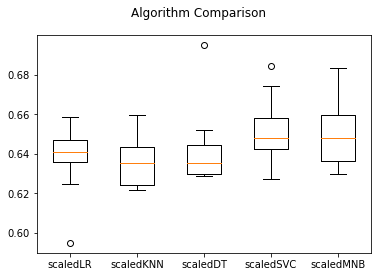

In [59]:
pipelines = []
pipelines.append(('scaledLR' , (Pipeline([('scaled' , StandardScaler()),('LR' ,LogisticRegression())]))))
pipelines.append(('scaledKNN' , (Pipeline([('scaled' , StandardScaler()),('KNN' ,KNeighborsClassifier())]))))
pipelines.append(('scaledDT' , (Pipeline([('scaled' , StandardScaler()),('DT' ,DecisionTreeClassifier())]))))
pipelines.append(('scaledSVC' , (Pipeline([('scaled' , StandardScaler()),('SVC' ,SVC())]))))
pipelines.append(('scaledMNB' , (Pipeline([('scaled' , StandardScaler()),('MNB' ,GaussianNB())]))))

model_name = []
results = []
for pipe ,model in pipelines:
    kfold = KFold(n_splits=10, random_state=42)
    crossv_results = cross_val_score(model , X_train ,y_train ,cv =kfold , scoring='accuracy')
    results.append(crossv_results)
    model_name.append(pipe)
    msg = "%s: %f (%f)" % (model_name, crossv_results.mean(), crossv_results.std())
    print(msg)
    
# Compare different Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(model_name)
plt.show()

#### knn

Trouver le nombre optimal de k 

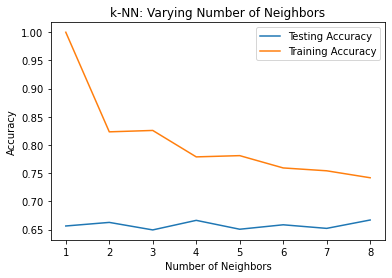

In [60]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


Precision, recall, f1-score

In [62]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Predict the labels of the test data: y_pred
y_pred = y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 990  322]
 [ 777 1211]]
              precision    recall  f1-score   support

           0       0.56      0.75      0.64      1312
           1       0.79      0.61      0.69      1988

    accuracy                           0.67      3300
   macro avg       0.68      0.68      0.67      3300
weighted avg       0.70      0.67      0.67      3300



#### DecisionTree

chercher les meilleurs paramètres

In [64]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.6715169236221868


Avec ou sans scaling ?

In [65]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))


Accuracy with Scaling: 0.6263636363636363
Accuracy without Scaling: 0.6506060606060606


#### SVM

In [67]:
from sklearn.model_selection import GridSearchCV
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}


# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))


Accuracy: 0.6648484848484848
              precision    recall  f1-score   support

           0       0.55      0.80      0.65      1312
           1       0.81      0.58      0.67      1988

    accuracy                           0.66      3300
   macro avg       0.68      0.69      0.66      3300
weighted avg       0.71      0.66      0.67      3300

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.01}
